### Problem Statement:

Finding Companies most probable to hire an ML Engineer/Data Analyst Applicant with respect to his/her skillset.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Data 

In [2]:
data = pd.read_excel("D:\\ML Project\\Feynn_Labs_Project_3\\naukri.xlsx")
data.head(5)

,title,title href,subTitle,subTitle href,starRating,reviewsCount,reviewsCount href,ellipsis,ellipsis 2,ellipsis 3,...,fleft,fleft 2,fleft 3,fleft 4,fleft 5,fleft 6,fleft 7,fleft 8,fleft 9,fleft 10
0,Global Tax Automation & Operations - Data Scie...,https://www.naukri.com/job-listings-global-tax...,Dell,https://www.naukri.com/dell-jobs-careers-27614,4.1,(2029 Reviews),https://www.ambitionbox.com/reviews/dell-revie...,3-5 Yrs,Not disclosed,Bangalore/Bengaluru,...,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,HOT JOB,3 Days Ago
1,Senior Analyst - Data Science,https://www.naukri.com/job-listings-senior-ana...,Tiger Analytics India LLP,https://www.naukri.com/tiger-analytics-india-c...,3.9,(31 Reviews),https://www.ambitionbox.com/reviews/tiger-anal...,1-6 Yrs,Not disclosed,Chennai,...,verbal communication,written,python,R,IT Skills,Data Science,Machine Learning,Artificial Intelligence,HOT JOB,1 Day Ago
2,Sr. Analyst - Data Engineering,https://www.naukri.com/job-listings-sr-analyst...,Dell,https://www.naukri.com/dell-jobs-careers-27614,4.1,(2029 Reviews),https://www.ambitionbox.com/reviews/dell-revie...,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,...,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,HOT JOB,4 Days Ago
3,Lead - Data Analyst,https://www.naukri.com/job-listings-lead-data-...,CARDINAL HEALTH INTERNATIONAL INDIA PRIVATE LI...,https://www.naukri.com/cardinal-health-interna...,4.3,(14 Reviews),https://www.ambitionbox.com/reviews/cardinal-h...,9-14 Yrs,Not disclosed,Bangalore/Bengaluru,...,Data Analysis,Python,SQL,IT Skills,Machine Learning,Artificial Intelligence,Jenkins,Bigtable,PREMIUM,2 Days Ago
4,Data Analyst,https://www.naukri.com/job-listings-data-analy...,Netomi,https://www.naukri.com/netomi-jobs-careers-545...,3.6,(2 Reviews),https://www.ambitionbox.com/reviews/netomi-rev...,3-6 Yrs,Not disclosed,Gurgaon/Gurugram,...,SAN,TAM,Google Analytics,GCP,Customer satisfaction,Machine learning,Data collection,Customer service,NaN,1 Day Ago


#### Data Cleaing and preprocessing

In [3]:
data = pd.DataFrame(data,columns=['title', 'subTitle','ellipsis', 'ellipsis 3', 'fleft', 'fleft 2', 'fleft 3',
        'fleft 4', 'fleft 5', 'fleft 6', 'fleft 7', 'fleft 8'])
data.head(2)

,title,subTitle,ellipsis,ellipsis 3,fleft,fleft 2,fleft 3,fleft 4,fleft 5,fleft 6,fleft 7,fleft 8
0,Global Tax Automation & Operations - Data Scie...,Dell,3-5 Yrs,Bangalore/Bengaluru,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA
1,Senior Analyst - Data Science,Tiger Analytics India LLP,1-6 Yrs,Chennai,verbal communication,written,python,R,IT Skills,Data Science,Machine Learning,Artificial Intelligence


In [4]:
data.rename(columns = {'title':'Work Profile', 'subTitle':'Company_Name', 'ellipsis': 'Years of Experience', 
                       'ellipsis 3': 'Location', 'fleft' : 'Skill 1', 'fleft 2' : 'Skill 2', 'fleft 3':'Skill 3',
                        'fleft 4': 'Skill 4', 'fleft 5': 'Skill 5', 'fleft 6': 'Skill 6', 'fleft 7':'Skill 7',
                        'fleft 8':'Skill 8'}, inplace = True)
data.columns

Index(['Work Profile', 'Company_Name', 'Years of Experience', 'Location',
       'Skill 1', 'Skill 2', 'Skill 3', 'Skill 4', 'Skill 5', 'Skill 6',
       'Skill 7', 'Skill 8'],
      dtype='object')

In [5]:
#Extracting 10 companies higest in terms of value count
k=pd.Series(data['Company_Name'].value_counts().nlargest(10)).reset_index()
k.rename(columns = {'index': 'Company_Name', 'Company_Name': 'Count'}, inplace = True)

In [6]:
k["Company_Name"].tolist()

['Accenture',
 'Microsoft',
 'IBM',
 'Huquo Consulting Pvt. Ltd',
 'TEKION',
 'Dell',
 'Kyndryl',
 'Siemens',
 'Gojek',
 'Multi Recruit']

In [7]:
##Extracting the data frame based ont the top 10 most frequest companies
list=k["Company_Name"].tolist()
dataTop10Companies=data.query('Company_Name in @list')


In [8]:
dataTop10Companies

,Work Profile,Company_Name,Years of Experience,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8
0,Global Tax Automation & Operations - Data Scie...,Dell,3-5 Yrs,Bangalore/Bengaluru,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA
2,Sr. Analyst - Data Engineering,Dell,3-8 Yrs,Bangalore/Bengaluru,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL
10,Data Analyst,IBM,1-4 Yrs,Bangalore/Bengaluru,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science
18,Lead Business Analyst - Data Science,TEKION,2-6 Yrs,Bangalore/Bengaluru,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst
28,Data Analyst,TEKION,2-7 Yrs,Bangalore/Bengaluru,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Data Scientist 2,Microsoft,6-9 Yrs,Hyderabad/Secunderabad,IT Skills,Python,Testing,Data Science,Machine Learning,Cloud,Program Management,Cloud computing
1025,ACN - Applied Intelligence - Solutions.AI - Da...,Accenture,2-5 Yrs,Bangalore/Bengaluru,SAS,SQL,Python,IT Skills,Machine Learning,Oracle,MS SQL,Big Data
1026,ACN - Applied Intelligence - Solutions.AI - Da...,Accenture,2-5 Yrs,Bangalore/Bengaluru,SQL,R,Python,SAS,Hadoop,Analytics,PIG,Business objects
1029,Senior Analyst Competitive Intelligence,Dell,5-8 Yrs,Bangalore/Bengaluru,Power BI,VBA,SQL Server,IT Skills,Python,Excel,Artificial Intelligence,Competitive Intelligence


In [9]:
dataTop10Companies["Years of Experience"].unique()

array(['3-5 Yrs', '3-8 Yrs', '1-4 Yrs', '2-6 Yrs', '2-7 Yrs', '3-7 Yrs',
       '5-6 Yrs', '5-8 Yrs', '15-17 Yrs', '0-3 Yrs', '5-10 Yrs',
       '3-4 Yrs', '4-6 Yrs', '5-9 Yrs', '4-10 Yrs', '6-12 Yrs', '5-7 Yrs',
       '10-15 Yrs', '2-5 Yrs', '4-8 Yrs', '7-12 Yrs', '2-3 Yrs',
       '1-2 Yrs', '2-4 Yrs', '11-15 Yrs', '6-10 Yrs', '8-10 Yrs',
       '4-7 Yrs', '1-3 Yrs', '6-8 Yrs', '6-11 Yrs', '6-7 Yrs',
       '13-15 Yrs', '0-5 Yrs', '0-1 Yrs', '1-6 Yrs', '3-6 Yrs',
       '8-12 Yrs', '6-9 Yrs'], dtype=object)

In [10]:
df=dataTop10Companies

In [11]:
df["Min Experience"]=data["Years of Experience"].str.split("-").str[0]

In [12]:
df

,Work Profile,Company_Name,Years of Experience,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience
0,Global Tax Automation & Operations - Data Scie...,Dell,3-5 Yrs,Bangalore/Bengaluru,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3
2,Sr. Analyst - Data Engineering,Dell,3-8 Yrs,Bangalore/Bengaluru,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3
10,Data Analyst,IBM,1-4 Yrs,Bangalore/Bengaluru,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1
18,Lead Business Analyst - Data Science,TEKION,2-6 Yrs,Bangalore/Bengaluru,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2
28,Data Analyst,TEKION,2-7 Yrs,Bangalore/Bengaluru,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Data Scientist 2,Microsoft,6-9 Yrs,Hyderabad/Secunderabad,IT Skills,Python,Testing,Data Science,Machine Learning,Cloud,Program Management,Cloud computing,6
1025,ACN - Applied Intelligence - Solutions.AI - Da...,Accenture,2-5 Yrs,Bangalore/Bengaluru,SAS,SQL,Python,IT Skills,Machine Learning,Oracle,MS SQL,Big Data,2
1026,ACN - Applied Intelligence - Solutions.AI - Da...,Accenture,2-5 Yrs,Bangalore/Bengaluru,SQL,R,Python,SAS,Hadoop,Analytics,PIG,Business objects,2
1029,Senior Analyst Competitive Intelligence,Dell,5-8 Yrs,Bangalore/Bengaluru,Power BI,VBA,SQL Server,IT Skills,Python,Excel,Artificial Intelligence,Competitive Intelligence,5


In [13]:
df.drop("Years of Experience", axis=1, inplace=True)

In [14]:
df.head()

,Work Profile,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience
0,Global Tax Automation & Operations - Data Scie...,Dell,Bangalore/Bengaluru,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3
2,Sr. Analyst - Data Engineering,Dell,Bangalore/Bengaluru,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3
10,Data Analyst,IBM,Bangalore/Bengaluru,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1
18,Lead Business Analyst - Data Science,TEKION,Bangalore/Bengaluru,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2
28,Data Analyst,TEKION,Bangalore/Bengaluru,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2


In [15]:
df["Location"]=df["Location"].str.split("/").str[0]

In [16]:
df.head()

,Work Profile,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience
0,Global Tax Automation & Operations - Data Scie...,Dell,Bangalore,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3
2,Sr. Analyst - Data Engineering,Dell,Bangalore,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3
10,Data Analyst,IBM,Bangalore,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1
18,Lead Business Analyst - Data Science,TEKION,Bangalore,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2
28,Data Analyst,TEKION,Bangalore,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2


In [17]:
df["Work Profile"]=dataTop10Companies["Work Profile"].str. lower()

In [18]:
df

,Work Profile,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience
0,global tax automation & operations - data scie...,Dell,Bangalore,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3
2,sr. analyst - data engineering,Dell,Bangalore,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3
10,data analyst,IBM,Bangalore,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1
18,lead business analyst - data science,TEKION,Bangalore,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2
28,data analyst,TEKION,Bangalore,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,data scientist 2,Microsoft,Hyderabad,IT Skills,Python,Testing,Data Science,Machine Learning,Cloud,Program Management,Cloud computing,6
1025,acn - applied intelligence - solutions.ai - da...,Accenture,Bangalore,SAS,SQL,Python,IT Skills,Machine Learning,Oracle,MS SQL,Big Data,2
1026,acn - applied intelligence - solutions.ai - da...,Accenture,Bangalore,SQL,R,Python,SAS,Hadoop,Analytics,PIG,Business objects,2
1029,senior analyst competitive intelligence,Dell,Bangalore,Power BI,VBA,SQL Server,IT Skills,Python,Excel,Artificial Intelligence,Competitive Intelligence,5


In [19]:
df['Location'].value_counts()

Bangalore               118
Gurgaon                  18
Hyderabad                15
Pune                     10
Mumbai                   10
Chennai                   9
Delhi                     6
Noida                     4
Kolkata                   2
Delhi NCR                 1
Noida, Hyderabad          1
New Delhi                 1
Delhi                     1
Noida, Bangalore          1
Noida, Gurgaon            1
Noida, Pune, Gurgaon      1
Bengaluru                 1
Name: Location, dtype: int64

In [20]:
df["Work Profile"].unique()

array(['global tax automation & operations - data scientist senior analyst',
       'sr. analyst - data engineering', 'data analyst',
       'lead business analyst - data science',
       'senior data analyst - r/ python - bfsi',
       'data analyst - r/python/machine learning algorithms',
       'data analyst - r / python/ machine learning algorithms',
       'data analyst - r/ python/ machine learning algorithms',
       'data & applied scientist', 'data analyst - bfsi',
       'senior data analyst - r/python - bfsi',
       'senior data & applied scientist', 'lead data scientist',
       'senior data analyst - crm',
       'data analyst - mass transit - railway infrastructure',
       'senior data scientist', 'data analyst - transportation',
       'data scientist - python/sas/r', 'sr. data scientist',
       'data scientist',
       'analyst - data science - python/machine learning/analytics',
       'data scientist: artificial intelligence',
       'data & applied scientist 2', '

In [21]:
df1=df
#Defining the class of complain types
strings = ['scientist',"science", 'analyst', 'intelligence',"analytics","python", "performance", "machine"]
for x in strings:
    df1.loc[df1['Work Profile'].str.contains(x,na=True),'Work_Profile']=x
df1.loc[df1['Work Profile'].str.contains("scientist",na=True),'Work_Profile']="data_science"
df1.loc[df1['Work Profile'].str.contains("science",na=True),'Work_Profile']="data_science"
df1.loc[df1['Work Profile'].str.contains("analyst",na=True),'Work_Profile']="data_analyst"
df1.loc[df1['Work Profile'].str.contains("intelligence",na=True),'Work_Profile']="applied_intellegence"
df1.loc[df1['Work Profile'].str.contains("python",na=True),'Work_Profile']="python"
df1.loc[df1['Work Profile'].str.contains("performance",na=True),'Work_Profile']="perfomance_intelligence"
df1.loc[df1['Work Profile'].str.contains("machine",na=True),'Work_Profile']="machine_learning"
df1['Work_Profile'] = df1['Work_Profile'].fillna("OTHERS")

In [22]:
df1.drop("Work Profile",axis=1, inplace=True)

In [23]:
df_location=df1

In [24]:
df1.to_csv("df_location")

In [25]:
df_location.head()

,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience,Work_Profile
0,Dell,Bangalore,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3,data_analyst
2,Dell,Bangalore,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3,data_analyst
10,IBM,Bangalore,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1,data_analyst
18,TEKION,Bangalore,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2,data_analyst
28,TEKION,Bangalore,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2,data_analyst


In [26]:
df1

,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience,Work_Profile
0,Dell,Bangalore,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3,data_analyst
2,Dell,Bangalore,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3,data_analyst
10,IBM,Bangalore,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1,data_analyst
18,TEKION,Bangalore,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2,data_analyst
28,TEKION,Bangalore,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2,data_analyst
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Microsoft,Hyderabad,IT Skills,Python,Testing,Data Science,Machine Learning,Cloud,Program Management,Cloud computing,6,data_science
1025,Accenture,Bangalore,SAS,SQL,Python,IT Skills,Machine Learning,Oracle,MS SQL,Big Data,2,applied_intellegence
1026,Accenture,Bangalore,SQL,R,Python,SAS,Hadoop,Analytics,PIG,Business objects,2,applied_intellegence
1029,Dell,Bangalore,Power BI,VBA,SQL Server,IT Skills,Python,Excel,Artificial Intelligence,Competitive Intelligence,5,applied_intellegence


In [27]:
df1.head()

,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience,Work_Profile
0,Dell,Bangalore,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3,data_analyst
2,Dell,Bangalore,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3,data_analyst
10,IBM,Bangalore,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1,data_analyst
18,TEKION,Bangalore,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2,data_analyst
28,TEKION,Bangalore,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2,data_analyst


In [28]:

df1.drop(["Skill 2","Skill 3","Skill 4","Skill 5","Skill 6","Skill 7","Skill 8","Location"], axis=1,inplace=True)

In [29]:
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile
0,Dell,Artificial Intelligence,3,data_analyst
2,Dell,Azure,3,data_analyst
10,IBM,IT Skills,1,data_analyst
18,TEKION,IT Skills,2,data_analyst
28,TEKION,Product Development,2,data_analyst


In [30]:
df1.to_csv("df1")

In [31]:
from sklearn.preprocessing import LabelEncoder
level=LabelEncoder()
df1["Company_Name"]=level.fit_transform(df1["Company_Name"])
df1["Skill 1"]=level.fit_transform(df1["Skill 1"])
df1["Min Experience"]=level.fit_transform(df1["Min Experience"])
df1["Work_Profile"]=level.fit_transform(df1["Work_Profile"])

In [32]:
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile
0,1,3,7,3
2,1,5,7,3
10,4,21,1,3
18,9,21,6,3
28,9,40,6,3


# Segment Extraction(Clustering)

In [33]:
from sklearn.cluster import KMeans

In [34]:
WCSS = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1)
    WCSS.append(kmeans.inertia_)

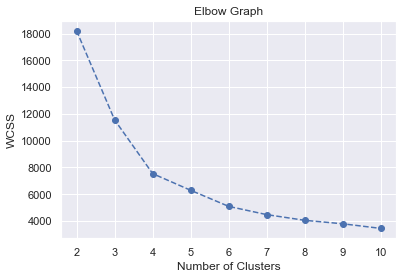

In [35]:
import seaborn as sns
sns.set()
plt.plot(range(2, 11), WCSS,'o--')
plt.title("Elbow Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [36]:
df_model1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [37]:
df_model1.fit(df1)

KMeans(n_clusters=4, random_state=42)

In [38]:
df_labels = df_model1.labels_
df_centroids = df_model1.cluster_centers_

In [39]:
#Calculating the silhouette score for Cluster no 6
from sklearn.metrics import silhouette_score
silhouette_score(df1,df_labels)

0.45786052285019435

In [40]:
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile
0,1,3,7,3
2,1,5,7,3
10,4,21,1,3
18,9,21,6,3
28,9,40,6,3


In [41]:
X=df1.values

In [42]:
#Initialize the class object
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
df1_cluster=kmeans.fit(X )
 
#predict the labels of clusters.
y_kmeans = kmeans.predict(X )

In [43]:
df_labels1 = df1_cluster.labels_
df_centroids1 = df1_cluster.cluster_centers_

In [44]:
from sklearn.metrics import silhouette_score
silhouette_score(X,df_labels1)

0.45786052285019435

# Visualization of Segments(Clusters)

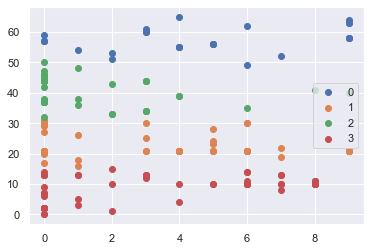

In [45]:
#Getting unique labels
u_labels = np.unique(y_kmeans)
#plotting the results:
for i in u_labels:
    plt.scatter(X[y_kmeans == i , 0] ,X[y_kmeans == i , 1] , label = i)
plt.legend()
plt.show()

### Data Preprocessing for Profiling and Describing Segments

In [46]:
df1=pd.read_csv("df1")
df1.head()

,Unnamed: 0,Company_Name,Skill 1,Min Experience,Work_Profile
0,0,Dell,Artificial Intelligence,3,data_analyst
1,2,Dell,Azure,3,data_analyst
2,10,IBM,IT Skills,1,data_analyst
3,18,TEKION,IT Skills,2,data_analyst
4,28,TEKION,Product Development,2,data_analyst


In [47]:
df1.drop("Unnamed: 0", axis=1, inplace=True)

In [48]:
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile
0,Dell,Artificial Intelligence,3,data_analyst
1,Dell,Azure,3,data_analyst
2,IBM,IT Skills,1,data_analyst
3,TEKION,IT Skills,2,data_analyst
4,TEKION,Product Development,2,data_analyst


In [49]:
df1['Skill 1'].value_counts()

IT Skills                50
Computer science         18
Applied Intelligence     10
R                        10
Data Science             10
                         ..
Azure                     1
Linux                     1
Communication             1
Google Cloud Platform     1
SQL                       1
Name: Skill 1, Length: 66, dtype: int64

In [50]:
df1["Clusters"]=df1_cluster.labels_
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile,Clusters
0,Dell,Artificial Intelligence,3,data_analyst,3
1,Dell,Azure,3,data_analyst,3
2,IBM,IT Skills,1,data_analyst,1
3,TEKION,IT Skills,2,data_analyst,1
4,TEKION,Product Development,2,data_analyst,2


### Profiling and Describing Segments

In [51]:
ApplicantMagnitue_df = pd.DataFrame(df1.Clusters.value_counts().reset_index())
ApplicantMagnitue_df.rename(columns={"index": "Applicant_Groups",
                               "Clusters": "Applicant Group Magnitude"},inplace=True)
ApplicantMagnitue_df

,Applicant_Groups,Applicant Group Magnitude
0,1,70
1,3,59
2,2,45
3,0,26


In [52]:
data_groupded=df1.groupby(by=["Clusters"]).mean().reset_index()
data_groupded.rename(columns={"Clusters":"Applicant_Groups"},inplace=True)
data_groupded

,Applicant_Groups,Min Experience
0,0,3.038462
1,1,3.585714
2,2,2.333333
3,3,3.576271


In [53]:
profilling=pd.merge(data_groupded,ApplicantMagnitue_df, on="Applicant_Groups")
profilling.round()

,Applicant_Groups,Min Experience,Applicant Group Magnitude
0,0,3.0,26
1,1,4.0,70
2,2,2.0,45
3,3,4.0,59


In [54]:
df1.head(1)

,Company_Name,Skill 1,Min Experience,Work_Profile,Clusters
0,Dell,Artificial Intelligence,3,data_analyst,3


In [55]:
df1['Min Experience'].mean()

3.23

In [56]:
df.head()

,Company_Name,Skill 1,Min Experience,Work_Profile
0,1,3,7,3
2,1,5,7,3
10,4,21,1,3
18,9,21,6,3
28,9,40,6,3


In [57]:
df_location=pd.read_csv("df_location")

In [58]:
df_location.head()

,Unnamed: 0,Company_Name,Location,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5,Skill 6,Skill 7,Skill 8,Min Experience,Work_Profile
0,0,Dell,Bangalore,Artificial Intelligence,Data Science,Data Analytics,IT Skills,Python,Testing,Machine Learning,RPA,3,data_analyst
1,2,Dell,Bangalore,Azure,Data Engineering,ECS,IT Skills,Data Science,Machine Learning,Cloud,MS SQL,3,data_analyst
2,10,IBM,Bangalore,IT Skills,Java,Python,Software Development,Data Science,Machine Learning,Cloud,Computer science,1,data_analyst
3,18,TEKION,Bangalore,IT Skills,Python,Testing,Data Science,Project Management,Tableau,Power BI,Business Analyst,2,data_analyst
4,28,TEKION,Bangalore,Product Development,R,Business Solutions,Algorithms,Computer Science,Big Data,Data Analyst,Machine Learning,2,data_analyst


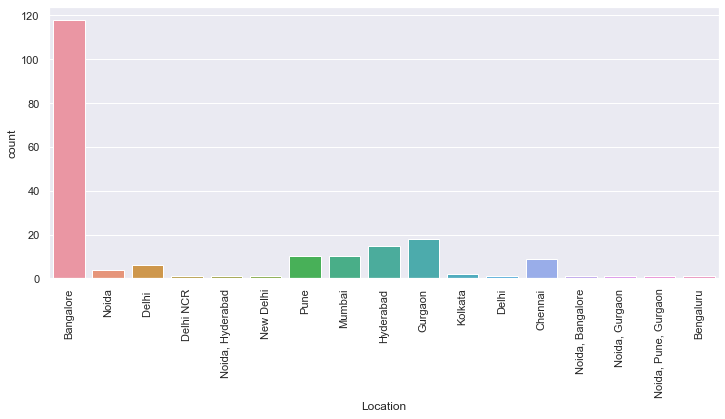

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(df_location['Location'])
degrees = 90
plt.xticks(rotation=degrees);

In [60]:
clust_1 = pd.DataFrame()
clust_2 = pd.DataFrame()
clust_3 = pd.DataFrame()
clust_4 = pd.DataFrame()

In [61]:
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile,Clusters
0,Dell,Artificial Intelligence,3,data_analyst,3
1,Dell,Azure,3,data_analyst,3
2,IBM,IT Skills,1,data_analyst,1
3,TEKION,IT Skills,2,data_analyst,1
4,TEKION,Product Development,2,data_analyst,2


In [62]:
df1["Location"]=df_location["Location"]

In [63]:
df1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile,Clusters,Location
0,Dell,Artificial Intelligence,3,data_analyst,3,Bangalore
1,Dell,Azure,3,data_analyst,3,Bangalore
2,IBM,IT Skills,1,data_analyst,1,Bangalore
3,TEKION,IT Skills,2,data_analyst,1,Bangalore
4,TEKION,Product Development,2,data_analyst,2,Bangalore


In [64]:
clust_1 = df1[df1['Clusters'] == 0]
clust_2 = df1[df1['Clusters'] == 1]
clust_3 = df1[df1['Clusters'] == 2]
clust_4 = df1[df1['Clusters'] == 3]

In [65]:
clust_1.head()

,Company_Name,Skill 1,Min Experience,Work_Profile,Clusters,Location
6,Huquo Consulting Pvt. Ltd,data analysis,3,machine_learning,0,Delhi
7,Huquo Consulting Pvt. Ltd,data analysis,3,machine_learning,0,Delhi NCR
20,Microsoft,Spark,5,data_science,0,Bangalore
32,Microsoft,deep learning,5,data_science,0,Bangalore
37,Gojek,Text mining,4,data_analyst,0,Bangalore


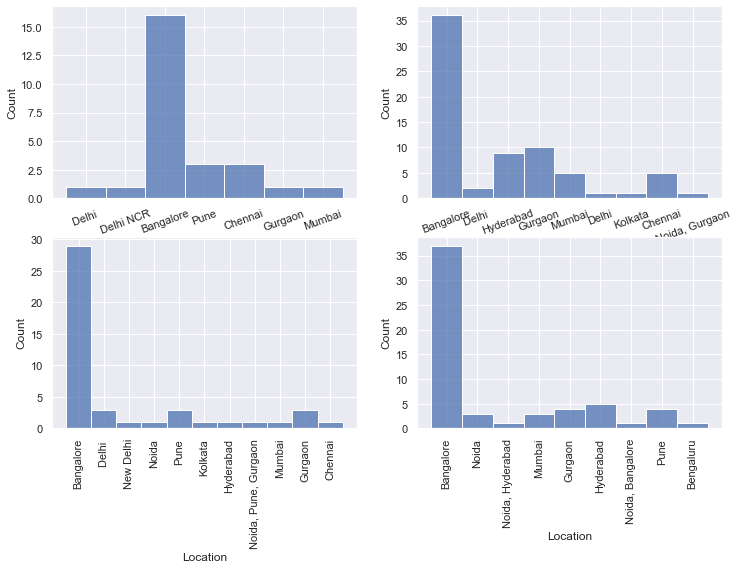

In [66]:
plt.figure(figsize=(12,12))

#plt.tight_layout(pad=6.0)
plt.subplot(3,2,1)
sns.histplot(clust_1['Location'])
degrees = 20
plt.xticks(rotation=degrees)
plt.subplot(3,2,2)
sns.histplot(clust_2['Location'])
degrees = 20
plt.xticks(rotation=degrees)
plt.subplot(3,2,3)
sns.histplot(clust_3['Location'])
degrees = 90
plt.xticks(rotation=degrees)
plt.subplot(3,2,4)
sns.histplot(clust_4['Location'])

degrees = 90
plt.xticks(rotation=degrees);

### Selection of Target Segment(s)

In [67]:
df1['Min Experience'].mean()


3.23

In [68]:
clust_1['Min Experience'].mean()

3.0384615384615383

In [69]:
clust_2['Min Experience'].mean()

3.585714285714286

In [70]:
clust_3['Min Experience'].mean()

2.3333333333333335

In [71]:
clust_4['Min Experience'].mean()

3.5762711864406778

In [72]:
df1['Work_Profile'].value_counts()

applied_intellegence       59
data_science               49
OTHERS                     40
data_analyst               20
machine_learning           14
python                      6
perfomance_intelligence     6
analytics                   6
Name: Work_Profile, dtype: int64

In [73]:
clust_1['Work_Profile'].value_counts()

OTHERS                     11
data_science                7
machine_learning            2
perfomance_intelligence     2
data_analyst                1
applied_intellegence        1
python                      1
analytics                   1
Name: Work_Profile, dtype: int64

In [74]:
clust_2['Work_Profile'].value_counts()

data_science               22
OTHERS                     16
applied_intellegence       15
data_analyst                7
perfomance_intelligence     4
machine_learning            3
analytics                   2
python                      1
Name: Work_Profile, dtype: int64

In [75]:
clust_3['Work_Profile'].value_counts()

applied_intellegence    28
data_analyst             6
data_science             4
machine_learning         3
OTHERS                   2
python                   1
analytics                1
Name: Work_Profile, dtype: int64

In [76]:
clust_4['Work_Profile'].value_counts()

data_science            16
applied_intellegence    15
OTHERS                  11
data_analyst             6
machine_learning         6
python                   3
analytics                2
Name: Work_Profile, dtype: int64

In [78]:
df2 = pd.read_csv("D:\\ML Project\\Feynn_Labs_Project_3\\Segments_Evaluation_Data.csv")

In [79]:
df2

,Customer_Groups,Average_Minimum_Experience,Rating(Value)_Min_Experience,Segment_Attractiveness,Percentage_Correspondance_of_available_work_profiles_with_respect_to_entire_dataset,Rating(Value)_work_profile_correspondance,Organizational_Competitiveness
0,0,3.04,8,8,62.17%,6.2,6.2
1,1,3.58,7,7,94.60%,9.4,9.4
2,2,2.33,3,3,74.33%,7.4,7.4
3,3,3.57,7,7,97.30%,9.7,9.7


In [80]:
df2["Customer_Groups"][0:4]

0    0
1    1
2    2
3    3
Name: Customer_Groups, dtype: int64

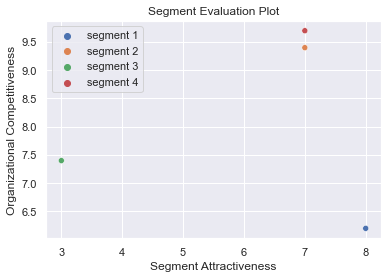

In [81]:
x1 = np.asarray(df2['Segment_Attractiveness']).astype(np.float32)
y1 = np.asarray(df2['Organizational_Competitiveness']).astype(np.float32)
classes = ['segment 1', 'segment 2', 'segment 3','segment 4']
sns.scatterplot(x=x1, y=y1, hue=classes)
plt.xlabel('Segment Attractiveness')
plt.ylabel('Organizational Competitiveness')
plt.title('Segment Evaluation Plot')

plt.show()

**Observation :**

Segment 4 (the one which has a segment attractiveness score of 7 and organizational competitiveness score of 9.7 ) is the potential target segment.

But, Segment 2 (the one which has a segment attractiveness score of 7 and organizational competitiveness score of 9.4) can also be a potentail segment as both are close enough.

# Thank You!!